# Section 3: Training a Supervised Learning Model
### Lecture 11: Training an XGBoost Model
- https://xgboost.readthedocs.io/en/stable/get_started.html

gradient boosting is essentially a supervised learning algorithm

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../Modulo2/creditcard.csv.zip')

y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [2]:
# random_state = 42 reproduce this experiment 
# stratify, imbalanced nature of our data, we're going to have very few positive instances of our target variable.
# preseved when you split into the training and test set, meaning that you will be guaranteed instances of fraud in both cases. 
# training and testing fraud =1

# stratify separa teste e treino da classe de forma proporcional

In [4]:
import sklearn
print(sklearn.__version__)

1.6.1


In [5]:
from sklearn import set_config
set_config(display="text")  # desativa exibição HTML, usa só repr de texto

In [6]:
# XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. 
# Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target 
# variable by combining the estimates of a set of simpler, weaker models.

import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [8]:
model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [9]:
y_pred = model.predict(X_test)

In [10]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
print(set(y_pred)) # prever se é fraude 1 ou não 0

import numpy as np
np.unique(y_pred, return_counts=True)

{0, 1}


(array([0, 1]), array([28438,    43]))

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[28430,     2],
       [    8,    41]])

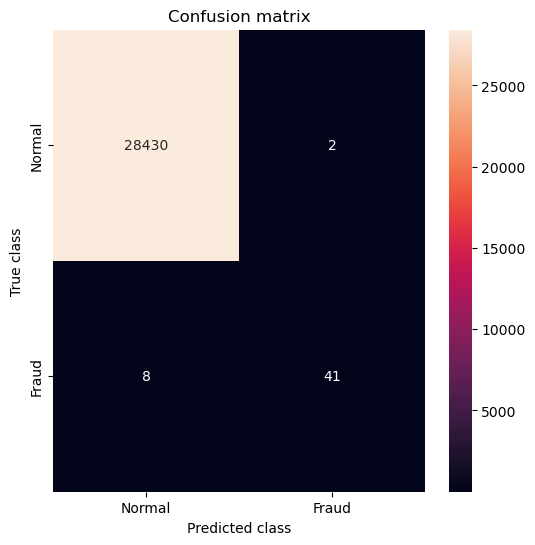

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

LABELS = ["Normal", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()